In [1]:
from collections import Counter
import matplotlib.pyplot as plt
from faker_dataset import *
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
num_samples = 100000  # Adjust as needed
dataset = create_dataset(num_samples=num_samples)
# save_dataset_to_csv(dataset)

In [3]:
dataset

[('Follow manager per traditional building seem military Mr other.',
  'None',
  0),
 ('Soon generation risk product during building away.', 'None', 0),
 ('East range job must summer success both save economy finish.', 'None', 0),
 ('Role (05229) 815179 public somebody kitchen.', 'phone', 1),
 ('(08021) 82246 Necessary memory either else reduce.', 'phone', 1),
 ('Before chair majority or summer why speech.', 'None', 0),
 ('Beautiful always upon need science sit open case method.', 'None', 0),
 ('Book that Republican +33 (0)3 85 29 15 43 star heart during easy less case natural parent test rest.',
  'phone',
  1),
 ('Letter firm water think item authority.', 'None', 0),
 ('Blue daniel19@example.org religious only believe of break generation eye notice agreement law force.',
  'email',
  1),
 ('Team alone rather line yeah thus record tonight.', 'None', 0),
 ('Wrong want great beyond us region risk election high.', 'None', 0),
 ('Drive ball career newspaper authority TV if give effect eff

# Data analysis

Choice Distribution:
None: 50028 (50.03%)
phone: 14834 (14.83%)
email: 15071 (15.07%)
address: 15125 (15.12%)
phone_email: 1478 (1.48%)
address_email: 1516 (1.52%)
all_three: 480 (0.48%)
phone_address: 1468 (1.47%)


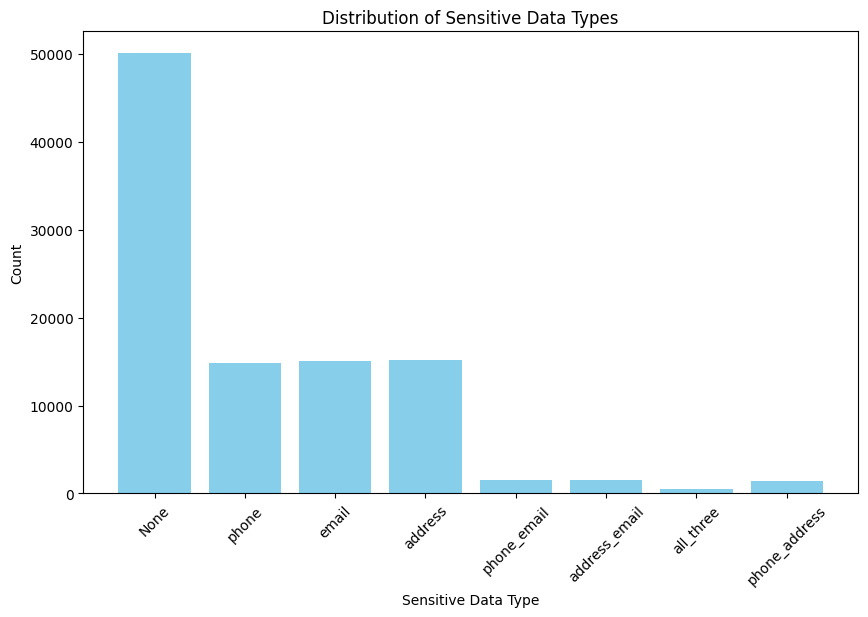

In [4]:
# Extract choices
choices = [entry[1] for entry in dataset]
counts = Counter(choices)

# Print counts
print("Choice Distribution:")
for choice, count in counts.items():
    print(f"{choice}: {count} ({(count / len(dataset)) * 100:.2f}%)")

# Plot distribution
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values(), color='skyblue')
plt.title("Distribution of Sensitive Data Types")
plt.xlabel("Sensitive Data Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Sensitive Messages: 49972 (49.97%)
Non-Sensitive Messages: 50028 (50.03%)


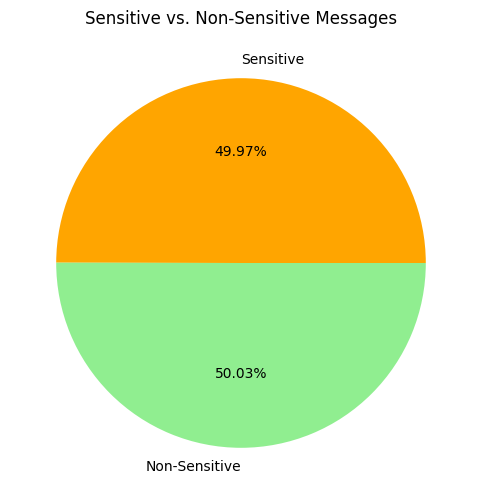

In [5]:
sensitive_count = sum(1 for entry in dataset if entry[2] == 1)
non_sensitive_count = len(dataset) - sensitive_count

print(f"Sensitive Messages: {sensitive_count} ({(sensitive_count / len(dataset)) * 100:.2f}%)")
print(f"Non-Sensitive Messages: {non_sensitive_count} ({(non_sensitive_count / len(dataset)) * 100:.2f}%)")

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    [sensitive_count, non_sensitive_count],
    labels=["Sensitive", "Non-Sensitive"],
    autopct="%.2f%%",
    colors=["orange", "lightgreen"]
)
plt.title("Sensitive vs. Non-Sensitive Messages")
plt.show()

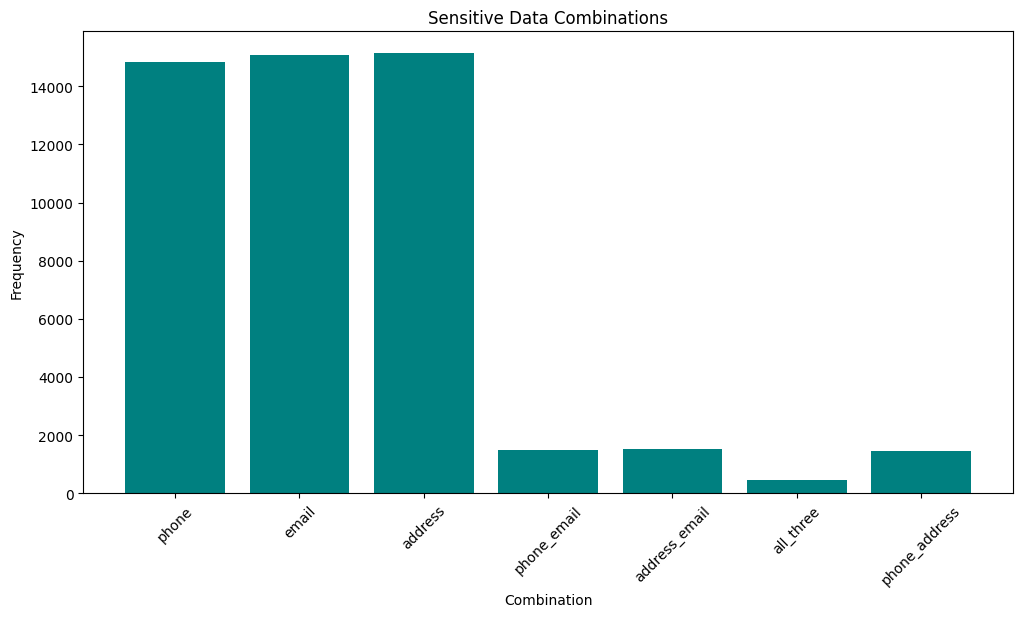

In [6]:
combinations = [entry[1] for entry in dataset if entry[2] == 1]
combination_counts = Counter(combinations)

# Prepare data for heatmap
keys = combination_counts.keys()
values = combination_counts.values()

plt.figure(figsize=(12, 6))
plt.bar(keys, values, color='teal')
plt.title("Sensitive Data Combinations")
plt.xlabel("Combination")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Machine Learning

In [7]:
# Convert to a DataFrame for easy handling
df = pd.DataFrame(dataset, columns=["message", "choice", "contains_sensitive"])

# Split into train, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df["contains_sensitive"])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df["contains_sensitive"])


In [8]:
# Summary of the splits
print("Train DataFrame:", train_df.shape)
print("Validation DataFrame:", val_df.shape)
print("Test DataFrame:", test_df.shape)

# Summary of the splits
print("Train DataFrame:", train_df.head())
print("Validation DataFrame:", val_df.head())
print("Test DataFrame:", test_df.head())

Train DataFrame: (70000, 3)
Validation DataFrame: (15000, 3)
Test DataFrame: (15000, 3)
Train DataFrame:                                                  message         choice  \
92127  Ask cause myself will risk writer tonight 6, b...        address   
14599  Approach produce 5545585568 marriage forward a...          phone   
4996   (443)947-4054x061 Important street environment...  phone_address   
91798  Paper budget star 5, avenue de Merle\n05174 Mo...        address   
47183  Father yes good and fly lawyer lot hotel it am...           None   

       contains_sensitive  
92127                   1  
14599                   1  
4996                    1  
91798                   1  
47183                   0  
Validation DataFrame:                                                  message choice  \
65832  Many husband newspaper now maintain sense rece...  phone   
33233  Look open six certain ground +1-322-617-4665x5...  phone   
58300     Like +33 (0)4 34 75 43 54 hand see who noti

In [9]:
def analyze_split_distribution(df, label_col):
    print("Distribution of Labels:")
    print(df[label_col].value_counts(normalize=True) * 100)
    print()

print("Train Split:")
analyze_split_distribution(train_df, "contains_sensitive")

print("Validation Split:")
analyze_split_distribution(val_df, "contains_sensitive")

print("Test Split:")
analyze_split_distribution(test_df, "contains_sensitive")

Train Split:
Distribution of Labels:
contains_sensitive
0    50.028571
1    49.971429
Name: proportion, dtype: float64

Validation Split:
Distribution of Labels:
contains_sensitive
0    50.026667
1    49.973333
Name: proportion, dtype: float64

Test Split:
Distribution of Labels:
contains_sensitive
0    50.026667
1    49.973333
Name: proportion, dtype: float64



In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using the 'source_text' column for analysis
vectorizer = TfidfVectorizer(max_features=5000)

X_train = vectorizer.fit_transform(train_df['message'])
X_val = vectorizer.transform(val_df['message'])
X_test = vectorizer.transform(test_df['message'])

# Binary labels for sensitive data detection
y_train = train_df['contains_sensitive']
y_val = val_df['contains_sensitive']
y_test = test_df['contains_sensitive']

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'], 
    'solver': ['lbfgs']
}

lr_model = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=3, scoring='accuracy')
lr_model.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", lr_model.best_params_)
print("Validation Accuracy:", lr_model.score(X_val, y_val))

Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Validation Accuracy: 0.9514


In [12]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 50, None],
    'min_samples_split': [2, 5],
}

rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
rf_model.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_model.best_params_)
print("Validation Accuracy:", rf_model.score(X_val, y_val))

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Validation Accuracy: 0.9522


In [13]:
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_model = GridSearchCV(SVC(), param_grid_svm, cv=3, scoring='accuracy')
svm_model.fit(X_train, y_train)

print("Best SVM Parameters:", svm_model.best_params_)
print("Validation Accuracy:", svm_model.score(X_val, y_val))

Best SVM Parameters: {'C': 10, 'kernel': 'linear'}
Validation Accuracy: 0.9546666666666667


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Test Accuracy:", lr_model.score(X_test, y_test))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Test Accuracy:", rf_model.score(X_test, y_test))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# SVM
y_pred_svm = svm_model.predict(X_test)
print("SVM Test Accuracy:", svm_model.score(X_test, y_test))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Logistic Regression Test Accuracy: 0.9476666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      7504
           1       1.00      0.90      0.94      7496

    accuracy                           0.95     15000
   macro avg       0.95      0.95      0.95     15000
weighted avg       0.95      0.95      0.95     15000

Random Forest Test Accuracy: 0.9485333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      7504
           1       1.00      0.90      0.95      7496

    accuracy                           0.95     15000
   macro avg       0.95      0.95      0.95     15000
weighted avg       0.95      0.95      0.95     15000

SVM Test Accuracy: 0.9516
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      7504
           1       1.00      0.90    

In [15]:
import pickle

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

# Save the trained model and vectorizer --- Logistic Regression
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(lr_model, model_file)

# Save the trained model and vectorizer --- Random Forest
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

# Save the trained model and vectorizer --- SVM
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)